First of all, we take a look at the shape of the product descriptions given

In [1]:
import pandas as pd

import numpy as np
from numpy.linalg import norm
from gtda.homology import VietorisRipsPersistence
import gudhi as gd
import gudhi.representations
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_json("./Musical_instruments_meta_2.json")

In [3]:
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[[Musical Instruments]],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,Vivaldi's famous set of four violin concertos ...
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[[Musical Instruments]],NaN,NaN,444 pages. \nReprint of corrected and revised ...
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN


We take a look at:

    a. How many of them have a description
    b. How many of them have more than 3 sentences as a description
    c. Average length of these descriptions

Thinking about [this paper](https://arxiv.org/abs/2003.13138)

In [4]:
non_nan_count = df['description'].count()
print("There are", non_nan_count, "rows with description, that is a", non_nan_count/df.shape[0]*100, "%")

There are 78629 rows with description, that is a 92.61257229007903 %


In [5]:
df['num_sentences_descr'] = df['description'].str.count('\.') + 1
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN,NaN
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[[Musical Instruments]],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[[Musical Instruments]],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN,NaN


In [6]:
three_or_more = (df['num_sentences_descr'] >= 3).sum()
print("There are", three_or_more, "rows whose descriptions contain 3 or more sentences, that is a", three_or_more/df.shape[0]*100, "%")

There are 51295 rows whose descriptions contain 3 or more sentences, that is a 60.41742735656824 %


In [7]:
avg_length = df["num_sentences_descr"].mean()
print("The mean length of the descriptions, when they are not null, is of ", avg_length, "sentence (separaded by .).")

The mean length of the descriptions, when they are not null, is of  5.232865736560302 sentence (separaded by .).


Concat, when exists, title, brands and category

In [8]:
df['categories'] = df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['categories_str'] = df['categories'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else '')
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr,categories_str
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G..."
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[Musical Instruments],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0,Musical Instruments
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0,"Musical Instruments, Instrument Accessories, G..."
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[Musical Instruments],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0,Musical Instruments
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G..."


In [9]:
df['combined_text'] = df.apply(
    lambda row: (
       ( str(row['brand']) + '. ' if not pd.isna(row['brand']) else '') +
        ( str(row['title']) +'. ' if not pd.isna(row['title']) else '') +
    ( str(row['categories_str']) + '. ' if not pd.isna(row['categories_str']) else '') +
    str(row['description'])),
    axis=1
)
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr,categories_str,combined_text
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G...","Six Sonatas For Two Flutes Or Violins, Volume ..."
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[Musical Instruments],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0,Musical Instruments,. Double Concerto in D Minor By Johann Sebasti...
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0,"Musical Instruments, Instrument Accessories, G...",Hal Leonard Vivaldi Four Seasons for Piano (Or...
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[Musical Instruments],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0,Musical Instruments,"Aida: Opera in Quattro Atti, Partitura -- Aida..."
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G...","Nocturnes. Musical Instruments, Instrument Acc..."


Compute again

In [10]:
non_nan_count = df['combined_text'].count()
print("There are", non_nan_count, "rows with description, that is a", non_nan_count/df.shape[0]*100, "%")
df['num_sentences_descr'] = df['combined_text'].str.count('\.') + 1
three_or_more = (df['num_sentences_descr'] >= 3).sum()
print("There are", three_or_more, "rows whose descriptions contain 3 or more sentences, that is a", three_or_more/df.shape[0]*100, "%")
avg_length = df["num_sentences_descr"].mean()
print("The mean length of the descriptions, when they are not null, is of ", avg_length, "sentences (separaded by .).")

There are 84901 rows with description, that is a 100.0 %
There are 80753 rows whose descriptions contain 3 or more sentences, that is a 95.11430960766069 %
The mean length of the descriptions, when they are not null, is of  7.29825325967892 sentences (separaded by .).


We compute TDA, following the approach in the paper: [TOPOLOGICAL DATA ANALYSIS IN TEXT CLASSIFICATION:
EXTRACTING FEATURES WITH ADDITIVE INFORMATION](https://arxiv.org/pdf/2003.13138.pdf)
* APPROACH 1: Topological features from word embeddings

We will take the embeddings from word2vec

In [11]:
# ONLY run once:

print(list(gensim.downloader.info()['models'].keys()))
google_vectors = gensim.downloader.load('word2vec-google-news-300')
# google_vectors.save('google.d2v')

In [11]:
# Load the downloaded values
from gensim.models import KeyedVectors
google_vectors_2 = KeyedVectors.load('google.d2v')
print(google_vectors_2.most_similar('twitter'))

[('Twitter', 0.8908904194831848), ('Twitter.com', 0.753678023815155), ('tweet', 0.7431625723838806), ('tweeting', 0.7161931991577148), ('tweeted', 0.7137225866317749), ('facebook', 0.6988551616668701), ('tweets', 0.6974530816078186), ('Tweeted', 0.6950210928916931), ('Tweet', 0.6875007152557373), ('Tweeting', 0.6845167279243469)]


In [12]:
def tda_text(sentence, display_results = True):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z']", " ", sentence)
    words = [w for w in sentence.split() if w in google_vectors_2.key_to_index]
    n = len(words)
    
    dissimilarity = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i, n):
            s = google_vectors_2.similarity(words[i], words[j])    
            dissimilarity[i][j] = 1 - s
            dissimilarity[j][i] = 1 - s
    
    # Instantiate topological transformer
    VR = VietorisRipsPersistence(metric="precomputed")

    # Compute persistence diagrams corresponding to each entry (only one here) in X
    persistence = VR.fit_transform([dissimilarity])[0]

    persistence_0 = persistence[persistence[:, -1] == 0][:, :2]
    persistence_1 = persistence[persistence[:, -1] == 1][:, :2]

    persistence_0_no_inf = np.array([bars for bars in persistence_0 if bars[1] != np.inf])
    persistence_1_no_inf = np.array([bars for bars in persistence_1 if bars[1] != np.inf])

    ####### Descriptors #######
    # Total persistence
    tp_0 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_0_no_inf), dtype=np.dtype(np.float64)))
    tp_1 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_1_no_inf), dtype=np.dtype(np.float64)))

    # Average lifetime
    al_0 = 0
    al_1 = 0

    # Standard deviation
    sd_0 = 0
    sd_1 = 0

    # Persistent entropy
    PE = gd.representations.Entropy()
    pe_0 = 0
    pe_1 = 0

    # Betti numbers
    bc = gd.representations.vector_methods.BettiCurve()
    bc_0 = np.zeros(100)
    bc_1 = np.zeros(100)

    # Landscapes
    num_landscapes = 10
    points_per_landscape = 100
    lc = gd.representations.Landscape(num_landscapes=num_landscapes, resolution=points_per_landscape)
    lc_0 = np.zeros(100)
    lc_1 = np.zeros(100)
    area_under_lc_0 = np.zeros(num_landscapes)
    area_under_lc_1 = np.zeros(num_landscapes)

    # Silhouettes
    p = 2
    resolution = 100
    s = gd.representations.Silhouette()
    s2 = gd.representations.Silhouette(weight=lambda x: np.power(x[1] - x[0], p), resolution=resolution)
    s_0 = np.zeros(100)
    s_1 = np.zeros(100)
    s2_0 = np.zeros(100)
    s2_1 = np.zeros(100)
    area_under_s_0 = 0
    area_under_s_1 = 0
    area_under_s2_0 = 0
    area_under_s2_1 = 0

    # compute
    if (persistence_0_no_inf.size > 0):
        al_0 = tp_0 / len(persistence_0_no_inf)
        sd_0 = np.std([(start + end) / 2 for start, end in persistence_0_no_inf])
        pe_0 = PE.fit_transform([persistence_0_no_inf])[0][0]
        bc_0 = bc(persistence_0_no_inf)
        lc_0 = lc(persistence_0_no_inf)
        reshaped_landscapes_0 = lc_0.reshape(num_landscapes,points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_0[i] = np.trapz(reshaped_landscapes_0[i], dx=1)
        s_0 = s(persistence_0_no_inf)
        s2_0 = s2(persistence_0_no_inf)
        area_under_s_0 = np.trapz(s_0, dx=1)
        area_under_s2_0 = np.trapz(s2_0, dx=1)

    if (persistence_1_no_inf.size > 0):
        al_1 = tp_1 / len(persistence_1_no_inf)
        sd_1 = np.std([(start + end) / 2 for start, end in persistence_1_no_inf])
        pe_1 = PE.fit_transform([persistence_1_no_inf])[0][0]
        bc_1 = bc(persistence_1_no_inf)
        lc_1 = lc(persistence_1_no_inf)
        reshaped_landscapes_1 = lc_1.reshape(num_landscapes, points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_1[i] = np.trapz(reshaped_landscapes_1[i], dx=1)
        s_1 = s(persistence_1_no_inf)
        s2_1 = s2(persistence_1_no_inf)
        area_under_s_1 = np.trapz(s_1, dx=1)
        area_under_s2_1 = np.trapz(s2_1, dx=1)

    if(display_results):
        # Very fancy print
        fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 40))

        gd.plot_persistence_barcode(persistence_0, axes=axes[0,0])
        axes[0, 0].set_title('Persistence barcode 0')
        
        gd.plot_persistence_barcode(persistence_1, axes=axes[0,1])
        axes[0, 1].set_title('Persistence barcode 1')
        
        axes[1, 0].plot(bc_0, marker='o')
        axes[1, 0].set_title('Betti numbers 0 ')
        
        axes[1, 1].plot(bc_1, marker='o')
        axes[1, 1].set_title('Betti numbers 1')
        
        axes[2, 0].plot(bc_0.cumsum(0), marker='o')
        axes[2, 0].set_title('Betti numbers 0 (cum sum)')
        
        axes[2, 1].plot(bc_1.cumsum(0), marker='o')
        axes[2, 1].set_title('Betti numbers 1 (cum sum)')
        
        axes[3, 0].plot(lc_0, marker='o')
        axes[3, 0].set_title('Landscape 0')
        
        axes[3, 1].plot(lc_1, marker='o')
        axes[3, 1].set_title('Landscape 1')
        
        axes[4, 0].plot(s_0, marker='o')
        axes[4, 0].set_title('Silhouette 0 - default')

        axes[4, 1].plot(s_1, marker='o')
        axes[4, 1].set_title('Silhouette 1 - default')
        
        axes[5, 0].plot(s2_0, marker='o')
        axes[5, 0].set_title('Silhouette 0 - quadratic')

        axes[5, 1].plot(s2_1, marker='o')
        axes[5, 1].set_title('Silhouette 1 - quadratic')

        plt.tight_layout()
        plt.show()

    return {'pt': [tp_0, tp_1], 'al': [al_0, al_1], 'sd': [sd_0, sd_1], 'pe': [pe_0, pe_1], 
                               'bn': [bc_0, bc_1], 'lc': [area_under_lc_0, area_under_lc_1], 
                               's': [area_under_s_0, area_under_s_1], 's2': [area_under_s2_0, area_under_s2_1]}

usetex mode requires TeX.


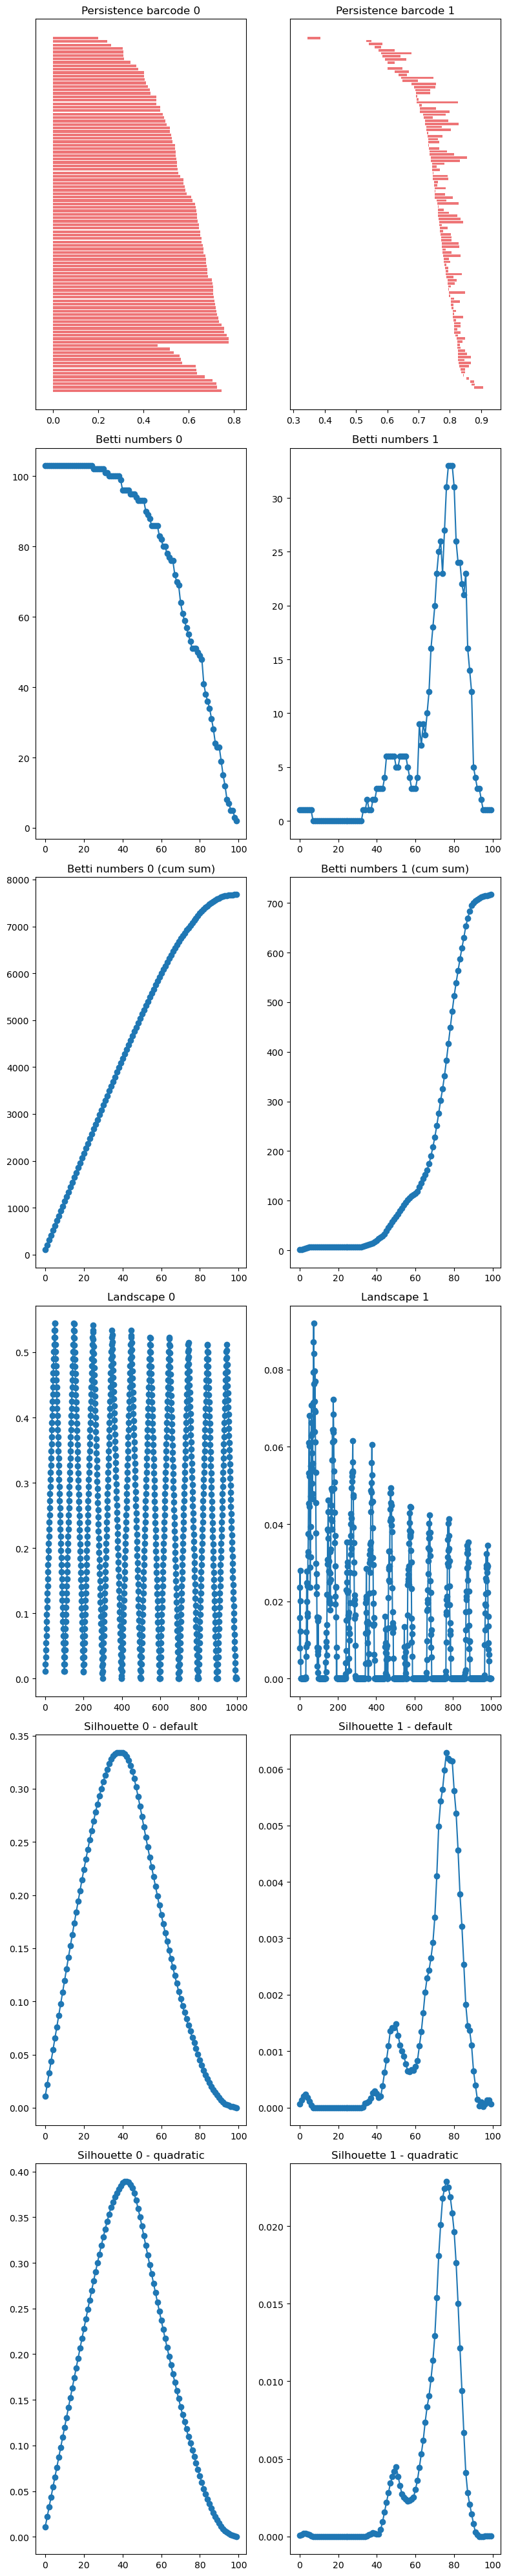

{'pt': [59.4908601641655, 3.9542404413223267],
 'al': [0.5775811666423835, 0.03408827966657178],
 'sd': [0.06660637906811125, 0.07857898205624467],
 'pe': [4.605715802640578, 4.430819148090018],
 'bn': [array([103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103,
         103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 102,
         102, 102, 102, 102, 102, 101, 101, 100, 100, 100, 100, 100, 100,
          99,  96,  96,  96,  96,  95,  95,  95,  94,  93,  93,  93,  93,
          90,  89,  88,  86,  86,  86,  86,  83,  82,  80,  80,  78,  77,
          76,  76,  72,  70,  69,  64,  61,  59,  57,  55,  53,  51,  51,
          51,  50,  49,  48,  41,  38,  36,  34,  31,  28,  24,  23,  23,
          19,  15,  12,   8,   7,   5,   5,   3,   2]),
  array([ 1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
          1,  2,  1,  1,  2,  2,  3,  3,  3,  3,  4,  6,  6,  6,  6,  6

In [13]:
tda_text("Musical Instruments Instrument Accessories Drum & Percussion Accessories Drum Set Accessories RTOM Moongel Damper Pads - Original Formula - 6 Pads - MG4RTOMRTOM Moongel Damper Pads - Original Formula - 6 Pads - MG4The world's most highly acclaimed resonance control device ever designed, is effective, simple and versatile.When only the most effective means of controlling a percussion instrument's sound will do, percussionists turn to the Moongel Damper Pad.The self-adhesive gel sticks to the surface of drums, cymbals, and most percussion instruments. The possibilities are endless, by simply moving the damper pad around the surface, you can eliminate any unwanted resonance, and obtain the exact sound the situation demands.The damper pad is washable and will retain its stickiness for years of service.The Moongel Damper Pad is made from a soft non-toxic gel, and is packaged in a durable plastic container. Drummers and sound studios around the world utilize this award-winning product.*Application Notes: The Moongel Damper Pad can be cut to any desirable size for those situations that call for a minimum amount of damping. For maximum resonance control place one damper pad at 12 o'clock or 6 o'clock, and a second damper pad at 3 o'clock or 9 o'clock.")

We can also try to separate the sentence into chunks; that may or may not overlap, and add the vectors to them, following [this paper]()

In [14]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))

def tda_text_chunks(sentence, display_results = True, num_chunks = 10, overlap = 2):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z']", " ", sentence)
    words = [w for w in sentence.split() if w in google_vectors_2.key_to_index]
    n = len(words)
    
    chunk_size = (n + (num_chunks - 1) * overlap) // num_chunks

    chunks = []
    start = 0

    for _ in range(num_chunks):
        end = min(start + chunk_size, n)
        chunks.append(words[start:end+1])
        start += chunk_size - overlap

    vectors = []
    for chunk in chunks:
        tmp = [google_vectors_2[word] for word in chunk]
        vectors.append(sum(tmp))
        
    # print(len(vectors), len(vectors[0]))
    n = len(chunks)
    
    dissimilarity = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i, n):
            s = cosine_similarity(vectors[i], vectors[j])    
            dissimilarity[i][j] = 1 - s
            dissimilarity[j][i] = 1 - s
    
    # Instantiate topological transformer
    VR = VietorisRipsPersistence(metric="precomputed")

    # Compute persistence diagrams corresponding to each entry (only one here) in X
    persistence = VR.fit_transform([dissimilarity])[0]

    persistence_0 = persistence[persistence[:, -1] == 0][:, :2]
    persistence_1 = persistence[persistence[:, -1] == 1][:, :2]

    persistence_0_no_inf = np.array([bars for bars in persistence_0 if bars[1] != np.inf])
    persistence_1_no_inf = np.array([bars for bars in persistence_1 if bars[1] != np.inf])

    ####### Descriptors #######
    # Total persistence
    tp_0 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_0_no_inf), dtype=np.dtype(np.float64)))
    tp_1 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_1_no_inf), dtype=np.dtype(np.float64)))

    # Average lifetime
    al_0 = 0
    al_1 = 0

    # Standard deviation
    sd_0 = 0
    sd_1 = 0

    # Persistent entropy
    PE = gd.representations.Entropy()
    pe_0 = 0
    pe_1 = 0

    # Betti numbers
    bc = gd.representations.vector_methods.BettiCurve()
    bc_0 = np.zeros(100)
    bc_1 = np.zeros(100)

    # Landscapes
    num_landscapes = 10
    points_per_landscape = 100
    lc = gd.representations.Landscape(num_landscapes=num_landscapes, resolution=points_per_landscape)
    lc_0 = np.zeros(100)
    lc_1 = np.zeros(100)
    area_under_lc_0 = np.zeros(num_landscapes)
    area_under_lc_1 = np.zeros(num_landscapes)

    # Silhouettes
    p = 2
    resolution = 100
    s = gd.representations.Silhouette()
    s2 = gd.representations.Silhouette(weight=lambda x: np.power(x[1] - x[0], p), resolution=resolution)
    s_0 = np.zeros(100)
    s_1 = np.zeros(100)
    s2_0 = np.zeros(100)
    s2_1 = np.zeros(100)
    area_under_s_0 = 0
    area_under_s_1 = 0
    area_under_s2_0 = 0
    area_under_s2_1 = 0

    # compute
    if (persistence_0_no_inf.size > 0):
        al_0 = tp_0 / len(persistence_0_no_inf)
        sd_0 = np.std([(start + end) / 2 for start, end in persistence_0_no_inf])
        pe_0 = PE.fit_transform([persistence_0_no_inf])[0][0]
        bc_0 = bc(persistence_0_no_inf)
        lc_0 = lc(persistence_0_no_inf)
        reshaped_landscapes_0 = lc_0.reshape(num_landscapes,points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_0[i] = np.trapz(reshaped_landscapes_0[i], dx=1)
        s_0 = s(persistence_0_no_inf)
        s2_0 = s2(persistence_0_no_inf)
        area_under_s_0 = np.trapz(s_0, dx=1)
        area_under_s2_0 = np.trapz(s2_0, dx=1)

    if (persistence_1_no_inf.size > 0):
        al_1 = tp_1 / len(persistence_1_no_inf)
        sd_1 = np.std([(start + end) / 2 for start, end in persistence_1_no_inf])
        pe_1 = PE.fit_transform([persistence_1_no_inf])[0][0]
        bc_1 = bc(persistence_1_no_inf)
        lc_1 = lc(persistence_1_no_inf)
        reshaped_landscapes_1 = lc_1.reshape(num_landscapes, points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_1[i] = np.trapz(reshaped_landscapes_1[i], dx=1)
        s_1 = s(persistence_1_no_inf)
        s2_1 = s2(persistence_1_no_inf)
        area_under_s_1 = np.trapz(s_1, dx=1)
        area_under_s2_1 = np.trapz(s2_1, dx=1)

    if(display_results):
        # Very fancy print
        fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 40))

        gd.plot_persistence_barcode(persistence_0, axes=axes[0,0])
        axes[0, 0].set_title('Persistence barcode 0')
        
        gd.plot_persistence_barcode(persistence_1, axes=axes[0,1])
        axes[0, 1].set_title('Persistence barcode 1')
        
        axes[1, 0].plot(bc_0, marker='o')
        axes[1, 0].set_title('Betti numbers 0 ')
        
        axes[1, 1].plot(bc_1, marker='o')
        axes[1, 1].set_title('Betti numbers 1')
        
        axes[2, 0].plot(bc_0.cumsum(0), marker='o')
        axes[2, 0].set_title('Betti numbers 0 (cum sum)')
        
        axes[2, 1].plot(bc_1.cumsum(0), marker='o')
        axes[2, 1].set_title('Betti numbers 1 (cum sum)')
        
        axes[3, 0].plot(lc_0, marker='o')
        axes[3, 0].set_title('Landscape 0')
        
        axes[3, 1].plot(lc_1, marker='o')
        axes[3, 1].set_title('Landscape 1')
        
        axes[4, 0].plot(s_0, marker='o')
        axes[4, 0].set_title('Silhouette 0 - default')

        axes[4, 1].plot(s_1, marker='o')
        axes[4, 1].set_title('Silhouette 1 - default')
        
        axes[5, 0].plot(s2_0, marker='o')
        axes[5, 0].set_title('Silhouette 0 - quadratic')

        axes[5, 1].plot(s2_1, marker='o')
        axes[5, 1].set_title('Silhouette 1 - quadratic')

        plt.tight_layout()
        plt.show()

    return {'pt': [tp_0, tp_1], 'al': [al_0, al_1], 'sd': [sd_0, sd_1], 'pe': [pe_0, pe_1], 
                               'bn': [bc_0, bc_1], 'lc': [area_under_lc_0, area_under_lc_1], 
                               's': [area_under_s_0, area_under_s_1], 's2': [area_under_s2_0, area_under_s2_1]}

10 300


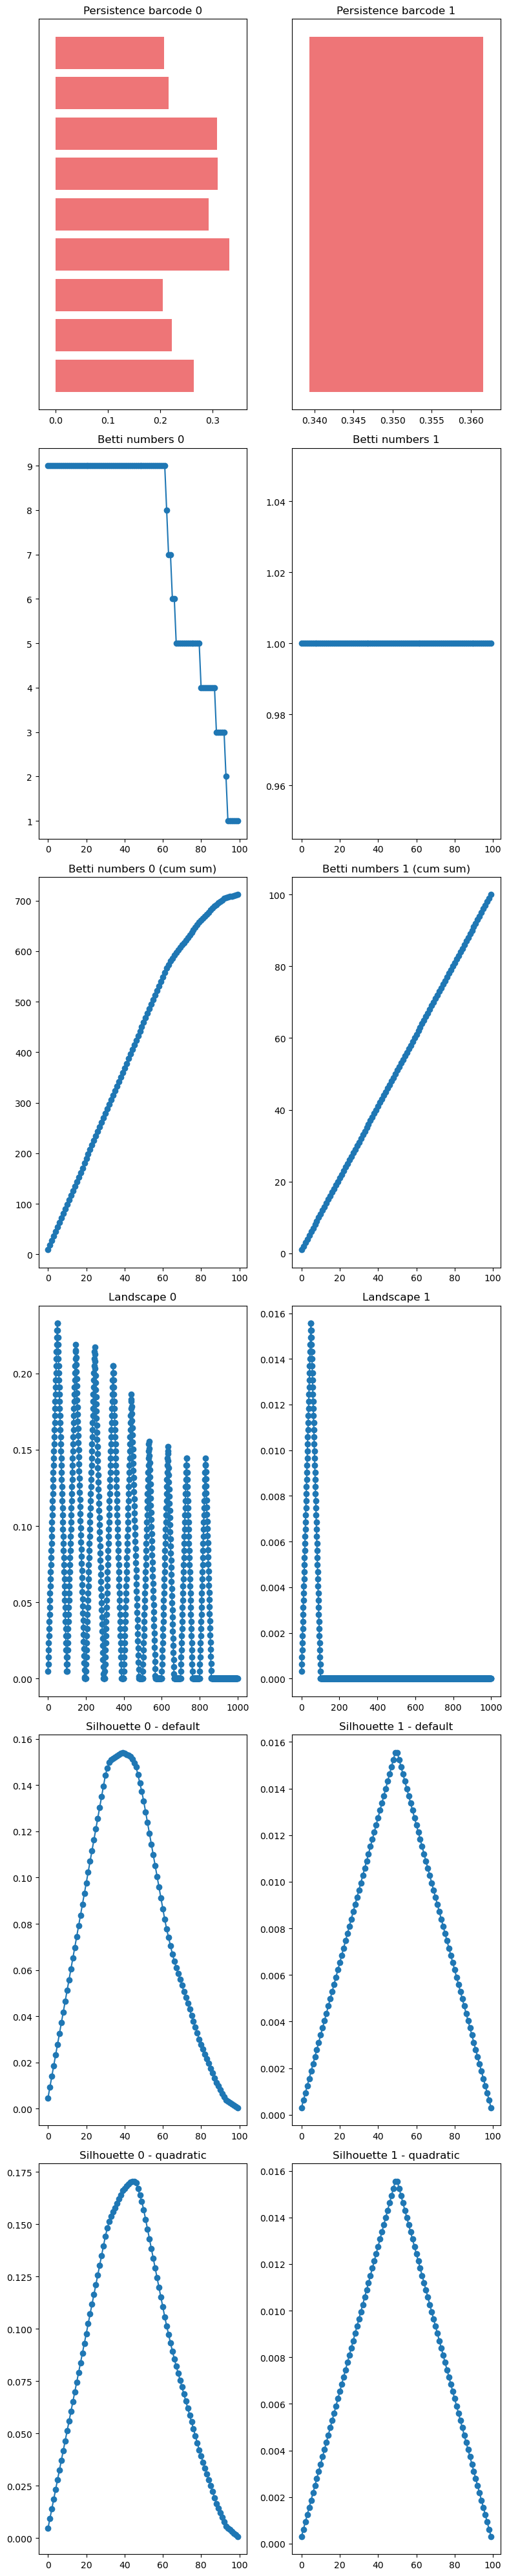

{'pt': [2.3573718070983887, 0.022214651107788086],
 'al': [0.2619302007887099, 0.022214651107788086],
 'sd': [0.02379463932194698, 0.0],
 'pe': [2.1806756530850855, -0.0],
 'bn': [array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
         9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
         9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 7, 6,
         6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,
         3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
 'lc': [array([11.86203984, 10.33042623, 10.20067893,  9.21074343,  7.50244638,
          5.28665114,  5.00876569,  4.61730463,

In [20]:
tda_text_chunks("Musical Instruments Instrument Accessories Drum & Percussion Accessories Drum Set Accessories RTOM Moongel Damper Pads - Original Formula - 6 Pads - MG4RTOMRTOM Moongel Damper Pads - Original Formula - 6 Pads - MG4The world's most highly acclaimed resonance control device ever designed, is effective, simple and versatile.When only the most effective means of controlling a percussion instrument's sound will do, percussionists turn to the Moongel Damper Pad.The self-adhesive gel sticks to the surface of drums, cymbals, and most percussion instruments. The possibilities are endless, by simply moving the damper pad around the surface, you can eliminate any unwanted resonance, and obtain the exact sound the situation demands.The damper pad is washable and will retain its stickiness for years of service.The Moongel Damper Pad is made from a soft non-toxic gel, and is packaged in a durable plastic container. Drummers and sound studios around the world utilize this award-winning product.*Application Notes: The Moongel Damper Pad can be cut to any desirable size for those situations that call for a minimum amount of damping. For maximum resonance control place one damper pad at 12 o'clock or 6 o'clock, and a second damper pad at 3 o'clock or 9 o'clock.")

* APPROACH 2: Topological features de TF-IDF space

We divide each document into 10 consecutive blocks of equal size, we calculate TF-IDF vector for each block. We
chose 10, but one may try different number of blocks for each document. However, we note that using a large number
of blocks could make the TF-IDF vectors too sparse, so that comparing them would not be useful. For instance, if an
average number of tokens in a document is only 200 tokens and we divide each of the documents into 100 blocks, there
would be two tokens in each block, and most of the blocks would have zero similarity

In our experiments, we work on graphs of 10 vertices, where each vertex is represented by its TF-IDF vector

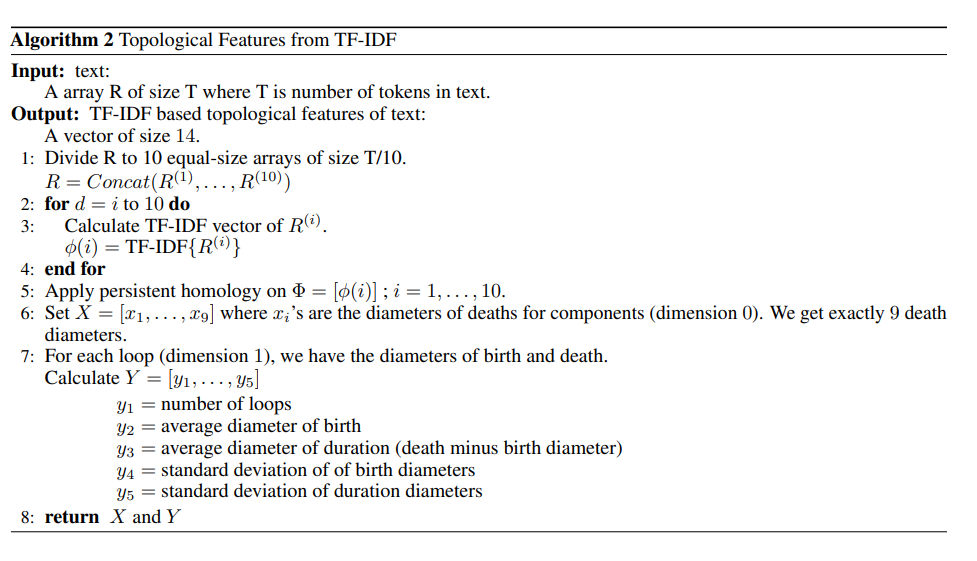

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

def calculate_tfidf(text):
    # Convert to lowercase
    text_lower = text.lower()

    # Remove non-word characters (keep only letters and numbers)
    text_cleaned = re.sub(r'\W', ' ', text_lower)
    
    # Step 1: Divide text into 10 equal-size arrays
    paraules = text_lower.split()
    T = len(paraules)
    
    n_blocks = 5
    
    chunks = []
    res = T%n_blocks
    chunk_size_a = T // n_blocks + 1 #arbitrariament trio que els primers siguin llargs
    a = []
    for i in range(0, res * chunk_size_a, chunk_size_a):
        a.append(" ".join(paraules[i:i + chunk_size_a]))
    chunk_size_b = T // n_blocks
    b = [" ".join(paraules[i:i + chunk_size_b]) for i in range(res * chunk_size_a, T, chunk_size_b)]
    chunks = a+b
    
    print(chunks)
    
    # Step 2-4: Calculate TF-IDF vectors for each chunk
    tfidf_vectorizer = TfidfVectorizer()
    aux = tfidf_vectorizer.fit_transform(chunks).toarray()
    
    return(np.asarray(aux))
    

# Example usage:
text = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Replace this with your actual array R

calculate_tfidf("a ba bb a b a")


['a ba', 'bb', 'a', 'b', 'a']


array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [12]:
print(df.loc[0,"combined_text"])
print(calculate_tfidf(df.loc[0,"combined_text"]))

Six Sonatas For Two Flutes Or Violins, Volume 2 (#4-6). Musical Instruments, Instrument Accessories, General Accessories, Sheet Music Folders. nan
['six sonatas for two', 'flutes or violins, volume', '2 (#4-6). musical instruments,', 'instrument accessories, general accessories,', 'sheet music folders. nan']
[[0.         0.         0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.
  0.5        0.5        0.5        0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.5        0.
  0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.70710678 0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.81649658 0.         0.         0.         0.40824829 0.40824829
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  